In [1]:
from gensim.models import doc2vec
from gensim.models.doc2vec import Doc2Vec
from gensim.models.keyedvectors import WordEmbeddingsKeyedVectors
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import warnings
import re
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/drive/MyDrive/user_book_sample.csv')

In [6]:
user_ids = data["customer_idx"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoede2user = {i: x for i, x in enumerate(user_ids)}

book_ids = data["isbn"].unique().tolist()
book2book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded2book = {i: x for i, x in enumerate(book_ids)}
data["encoded_idx"] = data["customer_idx"].map(user2user_encoded)
data["encoded_isbn"] = data["isbn"].map(book2book_encoded)

In [7]:
train, test = train_test_split(data,test_size = 0.2)
print(train.shape , test.shape)

(26230, 110) (6558, 110)


In [8]:
number_of_unique_user = len(data.encoded_idx.unique())
number_of_unique_book_id = len(data.encoded_isbn.unique())
print(number_of_unique_user, number_of_unique_book_id)
list_1 = []
for i in range(100):
    a = 'Book_vec_'+str(i)
    list_1.append(a)

475 22271


In [9]:
X = train[list_1].to_numpy()
Y = test[list_1].to_numpy()

In [10]:
Z = data[list_1].to_numpy()

In [11]:
train

,customer_idx,isbn,title,Cn_1,Cn_2,Cn_3,Cn_4,Book_vec_0,Book_vec_1,Book_vec_2,...,Book_vec_93,Book_vec_94,Book_vec_95,Book_vec_96,Book_vec_97,Book_vec_98,Book_vec_99,click,encoded_idx,encoded_isbn
27038,7002,9791190476096,한국 현대시의 사랑에 대한 연구(국학미래학술총서),인문,한국문학론,한국문학이론,한국현대시론,-0.244274,0.037614,0.086593,...,-0.527049,-0.084194,-0.047631,0.355728,-0.288892,0.008994,0.382969,0,6,18122
428,5283,9788927732914,Complete Guide to the TOPIK 1(Basic)(3판),한국소개도서,한국어학습,한국어능력시험,한국어능력시험,0.001286,-0.041194,-0.042331,...,-1.891007,1.175726,0.954113,0.456960,-0.348104,-1.265288,1.008026,1,18,116
8452,5375,9788976996237,서강 한국어 1B 중문판: 문법단어참고서(Paperback),한국소개도서,한국어학습,기타언어 사용자 대상,기타언어 사용자 대상,-0.028128,-0.026348,-0.014699,...,-0.123508,0.290900,0.085698,0.246296,-0.398990,0.261062,-0.290037,0,37,3283
25183,7002,9791188765133,근대와 민(한국학총서),역사문화,한국사,근현대사,한국근대사,-0.074024,-0.104184,0.195682,...,-0.321268,-0.525219,0.464342,0.337757,0.040905,0.163589,-0.006918,0,6,16688
32230,7002,9788997305131,문화연구의 종말과 생성(문화과학 이론신서 75),정치사회,사회학,각국사회문화,문화일반,-0.257152,0.135327,0.035590,...,-0.207782,-0.352323,0.172265,0.225159,-0.341162,-0.019758,0.421618,0,6,7197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29341,7002,9791185241395,우주와 과학 39: 태양계(세밀화 자연관찰),유아세,유아교양,지구우주,지구우주,-0.288714,-0.073370,-0.091914,...,-0.199423,0.231831,-0.032318,0.070918,-0.125317,-0.321935,0.103329,0,6,2889
15045,7002,9788930081139,새로운 한국경제발전사,경제경영,각국경제,한국경제,한국경제,-0.128771,-0.013699,0.203278,...,-0.527544,-0.439230,0.203862,0.093022,0.157504,0.332335,0.087731,0,6,8581
16535,7002,9788974838973,배움과 좌절의 갈림길 야학(한국 근현대 학교 풍경과 학생의 일상 8),역사문화,한국사,근현대사,한국근대사,-0.090518,-0.093634,0.068568,...,-0.600660,0.067660,-0.027108,0.355007,-0.244718,-0.014812,0.280239,0,6,9853
10017,5610,9788975858086,Communication English 3(CD1장포함),외국어,영어문법독해작문,대학교재,대학교재,-0.072769,0.010806,0.134611,...,-1.033660,0.490265,0.323710,0.986665,-1.075491,0.119113,0.116220,0,109,3282


In [12]:
train.customer_idx.value_counts()

7002    16768
7001      741
46        605
1351      283
5295      200
        ...  
5311        6
5359        6
5246        5
5554        5
3589        4
Name: customer_idx, Length: 475, dtype: int64

In [13]:
test.customer_idx.value_counts()

7002    4101
7001     205
46       172
1351      71
4900      47
        ... 
5775       1
5257       1
5806       1
5301       1
5441       1
Name: customer_idx, Length: 453, dtype: int64

In [14]:
n_latent_factors_user = 32
n_latent_factors_book = 32
n_latent_factors_mf = 8
n_users, n_books = number_of_unique_user, number_of_unique_book_id

book_input = keras.layers.Input(shape=[100],name='Book')

user_input = keras.layers.Input(shape=[1],name='User')
user_vec_mlp = keras.layers.Flatten(name='FlattenUsers-MLP')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding-MLP')(user_input))

user_vec_mf = keras.layers.Flatten(name='FlattenUsers-MF')(keras.layers.Embedding(n_users + 1, 100,name='User-Embedding-MF')(user_input))

concat = keras.layers.concatenate([book_input, user_vec_mlp], name='Concat')
dense = keras.layers.Dense(512,name='FullyConnected',activation='relu')(concat)
dense_2 = keras.layers.Dense(256,name='FullyConnected-1',activation='relu')(dense)
dense_3 = keras.layers.Dense(128,name='FullyConnected-2',activation='relu')(dense_2)
dense_4 = keras.layers.Dense(64,name='FullyConnected-3',activation='relu')(dense_3)
dense_5 = keras.layers.Dense(32,name='FullyConnected-4',activation='relu')(dense_4)

pred_mf = keras.layers.Dot(axes=1)([book_input, user_vec_mf])
pred_mlp = keras.layers.Dense(1, activation='relu',name='Activation')(dense_5)


combine_mlp_mf = keras.layers.concatenate([pred_mf, pred_mlp] ,name='Concat-MF-MLP')
result_combine = keras.layers.Dense(128,name='Combine-MF-MLP')(combine_mlp_mf)
deep_combine = keras.layers.Dense(64,name='FullyConnected-6')(result_combine)
deep_combine_2 = keras.layers.Dense(32,name='FullyConnected-7')(result_combine)
deep_combine_3 = keras.layers.Dense(16,name='FullyConnected-8')(deep_combine_2)
deep_combine_4 = keras.layers.Dense(8,name='FullyConnected-9')(deep_combine_3)



result = keras.layers.Dense(1,activation = 'sigmoid', kernel_initializer='lecun_uniform', name='Prediction')(deep_combine_4)


model = keras.Model([user_input, book_input], result)
opt = tf.keras.optimizers.Adam(learning_rate =0.0000001)
model.compile(optimizer='adam',loss= 'mse', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [15]:
auc = keras.callbacks.ModelCheckpoint('gb_auc_9.h5', save_best_only=True, monitor='val_auc', mode='max') 
pre = keras.callbacks.ModelCheckpoint('gb_pre_9.h5', save_best_only=True, monitor='val_precision', mode='max')
recall = keras.callbacks.ModelCheckpoint('gb_recall_9.h5', save_best_only=True, monitor='val_recall', mode='max')

In [16]:
history = model.fit([train.encoded_idx, X],train.click,batch_size = 64,epochs=100,callbacks=[EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=10), auc, pre, recall], verbose=1,validation_split=0.2) 

Epoch 1/100
328/328 [==============================] - 12s 25ms/step - loss: 0.0944 - accuracy: 0.9067 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4991 - val_loss: 0.0913 - val_accuracy: 0.9087 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/100
328/328 [==============================] - 6s 19ms/step - loss: 0.0930 - accuracy: 0.9070 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0913 - val_accuracy: 0.9087 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/100
328/328 [==============================] - 5s 16ms/step - loss: 0.0930 - accuracy: 0.9070 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0913 - val_accuracy: 0.9087 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 4/100
328/328 [==============================] - 6s 19ms/step - loss: 0.0930 - accuracy: 0.9070 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.09

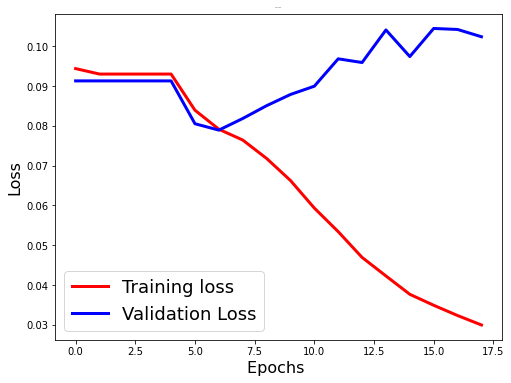

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=1)
plt.show()

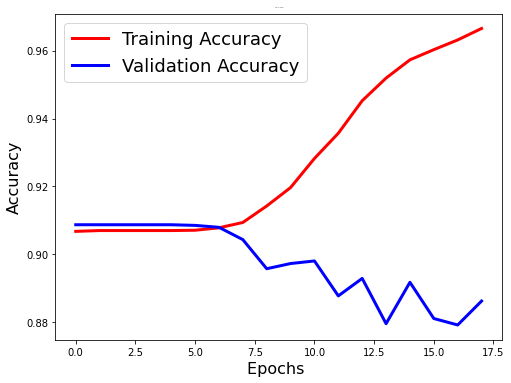

In [18]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=1)
plt.show()

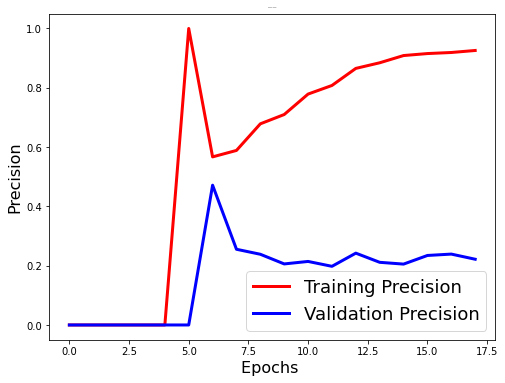

In [19]:
plt.figure(figsize=[8,6])
plt.plot(history.history['precision'],'r',linewidth=3.0)
plt.plot(history.history['val_precision'],'b',linewidth=3.0)
plt.legend(['Training Precision', 'Validation Precision'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Precision',fontsize=16)
plt.title('Precision Curves',fontsize=1)
plt.show()

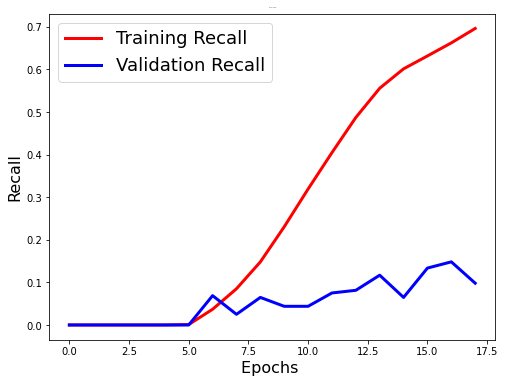

In [20]:
plt.figure(figsize=[8,6])
plt.plot(history.history['recall'],'r',linewidth=3.0)
plt.plot(history.history['val_recall'],'b',linewidth=3.0)
plt.legend(['Training Recall', 'Validation Recall'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Recall',fontsize=16)
plt.title('Recall Curves',fontsize=1)
plt.show()

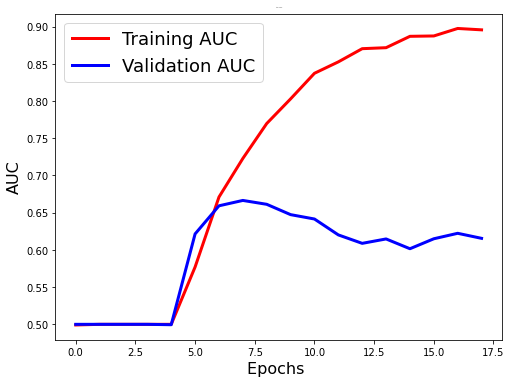

In [21]:
plt.figure(figsize=[8,6])
plt.plot(history.history['auc'],'r',linewidth=3.0)
plt.plot(history.history['val_auc'],'b',linewidth=3.0)
plt.legend(['Training AUC', 'Validation AUC'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('AUC',fontsize=16)
plt.title('AUC Curves',fontsize=1)
plt.show()

In [22]:
model_precision = load_model('gb_pre_9.h5')

In [23]:
model_recall = load_model('gb_recall_9.h5')

In [24]:
model_auc = load_model('gb_auc_9.h5')

In [25]:
loss, accuracy, auc, precision, recall = model_precision.evaluate([test.encoded_idx, Y], test.click, verbose=1)

205/205 [==============================] - 2s 6ms/step - loss: 0.0787 - accuracy: 0.9070 - precision: 0.4574 - recall: 0.0714 - auc: 0.6850


In [26]:
loss, accuracy, auc, precision, recall = model_recall.evaluate([test.encoded_idx, Y], test.click, verbose=1)

205/205 [==============================] - 3s 6ms/step - loss: 0.1029 - accuracy: 0.8827 - precision: 0.2700 - recall: 0.1628 - auc: 0.6196


In [27]:
loss, accuracy, auc, precision, recall = model_auc.evaluate([test.encoded_idx, Y], test.click, verbose=1)

205/205 [==============================] - 2s 4ms/step - loss: 0.0819 - accuracy: 0.9032 - precision: 0.2462 - recall: 0.0266 - auc: 0.6836


In [28]:
prediction = model_recall.predict([data.encoded_idx, Z])

1025/1025 [==============================] - 3s 3ms/step


In [29]:
test_sample = data

In [30]:
test_sample['prediction'] = prediction

In [31]:
test_sample_1 = test_sample.loc[test_sample['click'] == 1]

In [32]:
test_sample_1 = test_sample_1[['customer_idx', 'isbn', 'Cn_2', 'Cn_3', 'Cn_4', 'title', 'click', 'prediction']]
test_sample_1

,customer_idx,isbn,Cn_2,Cn_3,Cn_4,title,click,prediction
0,5060,9788974747398,철학,동양고전,논어,논어 백가락(가야금 명인 황병기의),1,0.879632
1,5060,9788928505326,음악,국악,현악기,12현 가야금 배우기 Level 1(가야금은 숙명처럼),1,0.998810
2,5060,9788956387949,음악,국악,현악기,가야금 교본(스프링),1,0.987144
3,5060,9788932625065,음악,국악,국악실기교육,가야금교본(증보판)(스프링),1,0.177142
4,4701,9791138313667,한국어학습,한국어학습 일반,한국어학습 일반,배워서 바로 써먹는 찰떡 한국어 필수 회화,1,0.015088
...,...,...,...,...,...,...,...,...
3028,7002,9788961473804,인문학일반,인문교양,인문교양,가족과 근대성,1,0.032411
3029,7002,9788972979869,사회학,사회학일반,시사사회비평,다시 촛불이 묻는다,1,0.000036
3030,7002,9788994606644,동양사,동남아시아사,동남아시아사,동아시아의 근대 장기지속으로 읽는다(19세기의 동아시아 5),1,0.979423
3031,7002,9791155922118,한국문학론,한국문학이론,한국문학이론일반,지역 인문학(지역문학총서 26)(양장본 HardCover),1,0.001456


In [33]:
test_sample_accurate = test_sample_1.loc[test_sample_1['prediction'] >= 0.5]
test_sample_accurate

,customer_idx,isbn,Cn_2,Cn_3,Cn_4,title,click,prediction
0,5060,9788974747398,철학,동양고전,논어,논어 백가락(가야금 명인 황병기의),1,0.879632
1,5060,9788928505326,음악,국악,현악기,12현 가야금 배우기 Level 1(가야금은 숙명처럼),1,0.998810
2,5060,9788956387949,음악,국악,현악기,가야금 교본(스프링),1,0.987144
6,663,9781635190250,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Learning Korean Through Tasks,1,0.943468
7,5147,9781635190250,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Learning Korean Through Tasks,1,0.964853
...,...,...,...,...,...,...,...,...
3012,7002,9788932321219,사회학,여성학남성학,여성학여성문제,"걸어간다, 우리가 멈추고 싶을 때까지",1,0.966219
3014,7002,9788954677813,사회문제복지,사회문제,인권문제,나는 감염되었다,1,0.717766
3025,7002,9788930040730,정치외교,외교국제관계,한국외교,"위안부 운동, 성역에서 광장으로(나남신서 2073)",1,0.976752
3030,7002,9788994606644,동양사,동남아시아사,동남아시아사,동아시아의 근대 장기지속으로 읽는다(19세기의 동아시아 5),1,0.979423


In [34]:
test_sample_inaccurate = test_sample_1.loc[test_sample_1['prediction'] < 0.5]
test_sample_inaccurate

,customer_idx,isbn,Cn_2,Cn_3,Cn_4,title,click,prediction
3,5060,9788932625065,음악,국악,국악실기교육,가야금교본(증보판)(스프링),1,1.771415e-01
4,4701,9791138313667,한국어학습,한국어학습 일반,한국어학습 일반,배워서 바로 써먹는 찰떡 한국어 필수 회화,1,1.508832e-02
5,1351,9791138313667,한국어학습,한국어학습 일반,한국어학습 일반,배워서 바로 써먹는 찰떡 한국어 필수 회화,1,6.606524e-04
14,5198,9791189581176,영어문고,기타영어문고,기타영어문고,No Longer Human(인간실격)(더클래식 미니미니북 영문판 19),1,8.259796e-09
15,4900,9791192186214,만화,만화,만화,토끼전: 연애제한구역 외전(스페셜 패키지),1,8.435327e-07
...,...,...,...,...,...,...,...,...
3026,7002,9788946080294,사회문제복지,노동문제,노동시장고용노사관련,산업사회의 이해(반양장),1,7.094193e-04
3027,7002,9788954445849,인문학일반,인문교양,인문교양,이것이 문화비평이다(자음과모음 하이브리드 총서 4),1,2.420278e-01
3028,7002,9788961473804,인문학일반,인문교양,인문교양,가족과 근대성,1,3.241141e-02
3029,7002,9788972979869,사회학,사회학일반,시사사회비평,다시 촛불이 묻는다,1,3.641983e-05


In [35]:
test_sample_0 = test_sample.loc[test_sample['click'] == 0]

In [36]:
test_sample_0

,customer_idx,isbn,title,Cn_1,Cn_2,Cn_3,Cn_4,Book_vec_0,Book_vec_1,Book_vec_2,...,Book_vec_94,Book_vec_95,Book_vec_96,Book_vec_97,Book_vec_98,Book_vec_99,click,encoded_idx,encoded_isbn,prediction
3033,46,9788939207189,아홉 번째 고독,소설,한국소설,한국소설일반,한국소설일반,-0.263364,0.063742,0.117936,...,-0.129315,-0.154053,0.338864,-0.632612,-0.008258,0.191500,0,282,2589,0.000613
3034,46,9788996295488,Kyungwoo Chun Photographs(양장본 HardCover),예술대중문화,사진영상,국내사진집,국내사진집,-0.153419,0.101954,-0.018022,...,-0.022761,0.396040,0.500060,0.154628,0.087985,-0.016617,0,282,2590,0.093186
3035,46,9788998739324,세월 속에 묻어버린 그림자,소설,한국소설,한국소설일반,한국소설일반,-0.428634,0.112894,0.131555,...,-0.139967,0.559781,0.562338,-0.517793,-0.122448,0.319954,0,282,2591,0.001274
3036,46,9788985645225,불멸의 도공,소설,한국소설,한국소설일반,한국소설일반,-0.219821,0.109287,0.084056,...,0.139880,0.105969,0.088118,-0.406951,0.337384,0.116166,0,282,2592,0.000242
3037,46,9788932039848,까마귀 클럽,소설,한국소설,한국소설일반,한국소설일반,-0.339585,0.027793,0.011584,...,0.266187,0.501101,0.537749,-0.291577,0.673877,-0.151208,0,282,1199,0.034533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32783,7002,9788991195479,한국 근현대 여성사: 정치 사회 3,정치사회,사회학,여성학남성학,여성학여성문제,-0.210346,-0.048167,-0.190937,...,-0.249370,-0.208981,1.285198,0.059427,0.148093,-0.026597,0,6,22269,0.000247
32784,7002,9791160807653,늘 그랬듯이 길을 찾아낼 것이다(큰글씨책),정치사회,사회학,여성학남성학,여성학여성문제,-0.081898,0.083707,-0.117182,...,-0.160536,0.000891,0.405737,-0.286659,-0.033707,0.404513,0,6,13389,0.054459
32785,7002,9791187064084,양성평등에 반대한다(도란스 기획 총서 1),정치사회,사회학,사회학일반,사회일반서,-0.137453,0.048890,-0.143683,...,-0.220135,0.217179,0.431779,-0.261711,0.305281,0.199554,0,6,8025,0.065471
32786,7002,9788991729384,되살아 나는 여성(여이연 이론 33),정치사회,사회학,여성학남성학,여성학여성문제,-0.167193,0.090769,-0.162879,...,0.138297,0.183174,-0.119947,-0.093066,-0.142270,0.997715,0,6,7678,0.045841
